<a href="https://colab.research.google.com/github/Jinnouchi4796/Jinnouchi4796/blob/main/kaggle_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 해결과정

## 사용된 툴
**코드 작동** Google colab (기본 요금제)

**생성형AI** Wrtn.ai, bing copilot, Gemini

***

## 해결 과정
프로젝트 이해 -> EDA -> 시각화 -> 전처리1 -> EDA2 ->

## 전처리
### 전처리1
범주형 데이터를 수치형 데이터로 변환

***

## DF설명
df_train : 학습데이터 원본

df_train_numeric : 상관계수 측정을 위한 수치값만 남겨둔 학습데이터

# 프로젝트 설명

케글의 ‘House Prices - Advanced Regression Techniques’ 대회는 주택 가격을 예측하는 머신러닝 경진대회입니다. 이 대회는 아이오와 주 에임스에 위치한 주택들의 가격을 예측하기 위해 79개의 설명 변수를 사용하여 참가자들의 창의적인 특성 공학과 고급 회귀 기법을 연습할 수 있는 기회를 제공합니다.

**대회 개요**:

- **목표**: 테스트 세트의 각 주택 ID에 대해 ‘SalePrice’ 변수의 값을 예측합니다.
- **평가 기준**: 예측값과 관측된 판매 가격의 로그 값 사이의 Root-Mean-Squared-Error (RMSE)로 평가됩니다.
- **제출 형식**: ‘Id,SalePrice’ 형태의 헤더를 포함한 파일을 제출해야 합니다.

**대회 설명**:

- 이 대회는 R 또는 Python 및 머신러닝 기초에 대한 경험이 있는 데이터 과학 학생들을 위한 완벽한 경쟁입니다.
- 참가자들은 창의적인 특성 공학과 랜덤 포레스트, 그래디언트 부스팅과 같은 고급 회귀 기술을 연습할 수 있습니다.

**자주 묻는 질문**:

- **‘Getting Started’ 대회란?**: 머신러닝 배경 지식이 거의 없는 사람들을 위해 케글 데이터 과학자들이 만든 대회입니다.
- **공개 리더보드와 비공개 리더보드의 차이점은?**: 공개 리더보드는 테스트 세트의 50% 예측을 반영하고, 비공개 리더보드는 나머지 50%를 반영하지만 대회 종료 시까지 보이지 않습니다.


# 데이터 탐색

In [37]:
# prompt: 코랩의 기본 폴더의 pricehousedata 폴더에 test.csv 와 train.csv 파일을 df형태로 불러오도록 해라.

import pandas as pd
df_train = pd.read_csv('./pricehousedata/train.csv')
df_test = pd.read_csv('./pricehousedata/test.csv')


In [38]:
# prompt: 두 데이터프레임에서 어떤 컬럼이 빠져 있는지 표시하라

missing_cols = set(df_train.columns) - set(df_test.columns)
print(missing_cols)


{'SalePrice'}


In [39]:
# prompt: 그리고 불러온 두 데이터에 대해서 데이터를 탐색하고 데이터의 기본적인 특징을 파악할 수 있는 코드를 작성하여라.

# Data exploration and basic statistics

# 1. Data size
print("Train data size:", df_train.shape)
print("Test data size:", df_test.shape)

# 2. Data types
print("Train data types:", df_train.dtypes)
print("Test data types:", df_test.dtypes)

# 3. Missing values
print("Train data missing values:", df_train.isnull().sum())
print("Test data missing values:", df_test.isnull().sum())

# 4. Descriptive statistics
print("Train data descriptive statistics:")
print(df_train.describe())
print("Test data descriptive statistics:")
print(df_test.describe())




Train data size: (1460, 81)
Test data size: (1459, 80)
Train data types: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Test data types: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object
Train data missing values: Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Test data missing values:

In [40]:
# 숫자 타입 데이터만을 포함하는 새로운 데이터프레임 생성
df_train_numeric = df_train.select_dtypes(include=['number'])
df_test_numeric = df_test.select_dtypes(include=['number'])

# 수정된 데이터프레임으로 상관계수 행렬 계산
print("Train data correlation matrix:")
print(df_train_numeric.corr())
print("Test data correlation matrix:")
print(df_test_numeric.corr())

Train data correlation matrix:
                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.3081

In [41]:
# prompt: 불러온 두개의 데이터에 대해서 데이터 분석 전문가에게 분석 결과를 넘겨줄 것이다. 그 이유는 어떠한 학습 형태가 적절한지, 어떠한 전처리가 필요한지, 중요한 피쳐를 어떻게 탐색할지 데이터 분석 전문가에게 답을 받기 위해서이다. 이에 필요한 분석 결과들을 표시하는 코드를 작성하여라. 해당 전문가는 사진은 볼 수 없고, 오직 글자로 된 결과만 볼 수 있다.

# 1. Data size

print("Train data size:", df_train.shape[0], "rows and", df_train.shape[1], "columns")
print("Test data size:", df_test.shape[0], "rows and", df_test.shape[1], "columns")

# 2. Data types

print("Train data types:")
for column, dtype in df_train.dtypes.items():
  print(f"  {column}: {dtype}")

print("Test data types:")
for column, dtype in df_test.dtypes.items():
  print(f"  {column}: {dtype}")

# 3. Missing values

print("Train data missing values:")
for column, missing_values in df_train.isnull().sum().items():
  print(f"  {column}: {missing_values}")

print("Test data missing values:")
for column, missing_values in df_test.isnull().sum().items():
  print(f"  {column}: {missing_values}")

# 4. Descriptive statistics

print("Train data descriptive statistics:")
print(df_train.describe())

print("Test data descriptive statistics:")
print(df_test.describe())

# 5. Correlation analysis

print("Train data correlation matrix:")
print(df_train_numeric.corr())

print("Test data correlation matrix:")
print(df_test_numeric.corr())


Train data size: 1460 rows and 81 columns
Test data size: 1459 rows and 80 columns
Train data types:
  Id: int64
  MSSubClass: int64
  MSZoning: object
  LotFrontage: float64
  LotArea: int64
  Street: object
  Alley: object
  LotShape: object
  LandContour: object
  Utilities: object
  LotConfig: object
  LandSlope: object
  Neighborhood: object
  Condition1: object
  Condition2: object
  BldgType: object
  HouseStyle: object
  OverallQual: int64
  OverallCond: int64
  YearBuilt: int64
  YearRemodAdd: int64
  RoofStyle: object
  RoofMatl: object
  Exterior1st: object
  Exterior2nd: object
  MasVnrType: object
  MasVnrArea: float64
  ExterQual: object
  ExterCond: object
  Foundation: object
  BsmtQual: object
  BsmtCond: object
  BsmtExposure: object
  BsmtFinType1: object
  BsmtFinSF1: int64
  BsmtFinType2: object
  BsmtFinSF2: int64
  BsmtUnfSF: int64
  TotalBsmtSF: int64
  Heating: object
  HeatingQC: object
  CentralAir: object
  Electrical: object
  1stFlrSF: int64
  2ndFlrSF: in

# 데이터 시각화

In [42]:
# prompt: plt 를 임포트하여라 sns 도 시각화하여라

import matplotlib.pyplot as plt
import seaborn as sns

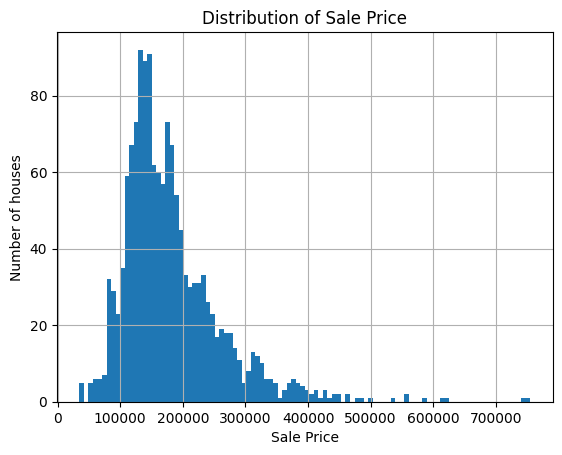

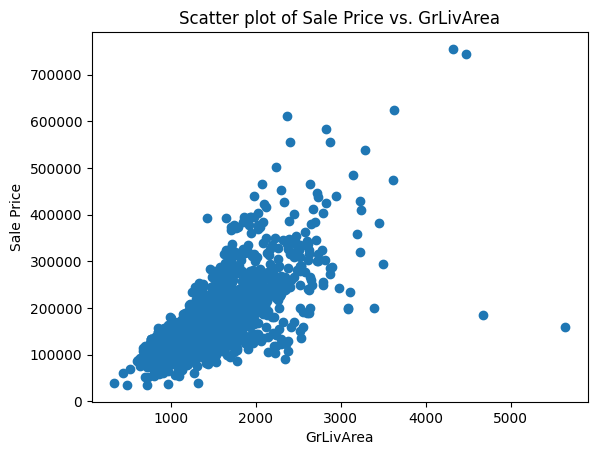

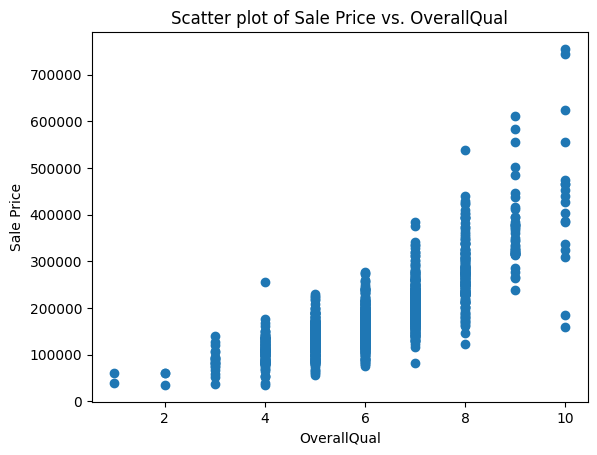

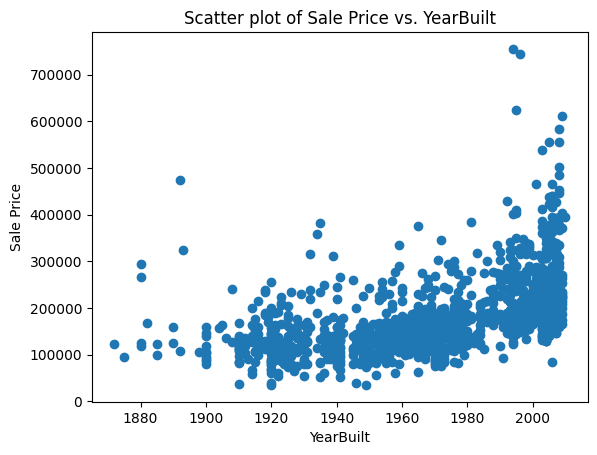

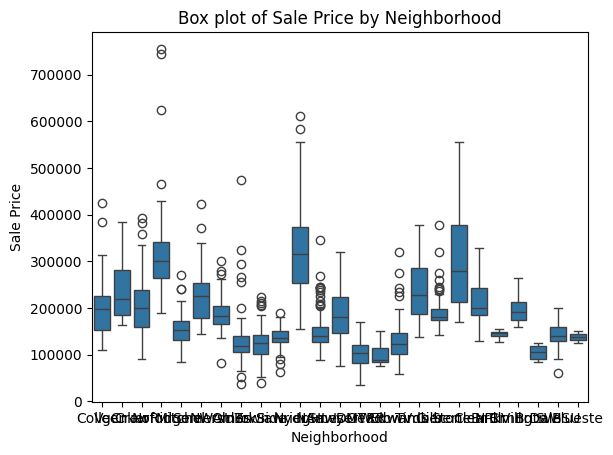

In [43]:
# prompt: df_train 에 대한 데이터 분석 EDA 결과를 여러 가지 관점에서 시각화하여라.

# 1. SalePrice 분포
df_train['SalePrice'].hist(bins=100)
plt.xlabel("Sale Price")
plt.ylabel("Number of houses")
plt.title("Distribution of Sale Price")
plt.show()

# 2. SalePrice와 GrLivArea의 상관관계
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.title("Scatter plot of Sale Price vs. GrLivArea")
plt.show()

# 3. SalePrice와 OverallQual의 상관관계
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])
plt.xlabel("OverallQual")
plt.ylabel("Sale Price")
plt.title("Scatter plot of Sale Price vs. OverallQual")
plt.show()

# 4. SalePrice와 YearBuilt의 상관관계
plt.scatter(df_train['YearBuilt'], df_train['SalePrice'])
plt.xlabel("YearBuilt")
plt.ylabel("Sale Price")
plt.title("Scatter plot of Sale Price vs. YearBuilt")
plt.show()

# 5. SalePrice와 Neighborhood의 상관관계
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_train)
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.title("Box plot of Sale Price by Neighborhood")
plt.show()


# 데이터 탐색 2

In [47]:
# prompt: df_train 에 object 형태의 데이터도 존재한다. 이를 처리하여 상관계수 측정이 가능하도록 수치값이 아닌 컬럼들 모두를 전처리해 보아라. 새로운 데이터프레임으로 생성하고, 이미 수치값인 컬럼들도 합한 df2를 만들어라.

import pandas as pd

# 범주형 데이터를 수치형 데이터로 변환
df_train = df_train.apply(pd.to_numeric, errors='ignore')

# 수치형 데이터만 포함하는 새로운 데이터프레임 생성
df_train_numeric = df_train.select_dtypes(include=['number'])

# 수치형 데이터가 아닌 컬럼들의 인덱스를 추출
non_numeric_cols = df_train.columns[~df_train.dtypes.isin(['int64', 'float64'])]

# 범주형 데이터를 수치형 데이터로 변환
for col in non_numeric_cols:
    df_train[col] = df_train[col].astype('category').cat.codes

# 수치값인 컬럼들과 범주형 데이터를 합한 새로운 데이터프레임 생성
df2 = pd.concat([df_train_numeric, df_train[non_numeric_cols]], axis=1)

# df2 출력
print(df2.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageYrBlt  GarageFinish  \
0          2003       196.0         706  ...           89             1   
1          1976         0.0         978  ...           62             1   
2          2002       162.0         486  ...           87             1   
3          1970         0.0         216  ...           84             2   
4          2000       350.0         655  ...           86             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  S

In [53]:
# prompt: df2 에 대한 상관계수를 측정하라. 그리고 SlaePrice와 상관계수 절대값 높은 순으로 전체 컬럼명을 표시하도록 해라. 시각화하기 않아도 되며, 최대한 많이 표시하라. 상관계수가 몇인지도 출력하라.

import pandas as pd

# 상관계수 행렬 계산
correlation_matrix = df2.corr()

# SalePrice와의 상관계수 절대값을 기준으로 내림차순 정렬
sorted_correlation = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

# 상관계수가 0.5 이상인 컬럼명과 상관계수 출력
for column, correlation in sorted_correlation.items():
    if abs(correlation) >= 0.5:
        print(f"{column}: {correlation}")


SalePrice: 1.0
OverallQual: 0.7909816005838053
GrLivArea: 0.7086244776126515
GarageCars: 0.6404091972583519
ExterQual: 0.6368836943991115
GarageArea: 0.6234314389183622
TotalBsmtSF: 0.6135805515591943
1stFlrSF: 0.6058521846919153
KitchenQual: 0.5891887782994231
FullBath: 0.5606637627484453
TotRmsAbvGrd: 0.5337231555820284
GarageYrBlt: 0.5275271515256875
YearBuilt: 0.5228973328794967
YearRemodAdd: 0.5071009671113866


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
                  ...   
PoolQC              int8
Fence               int8
MiscFeature         int8
SaleType            int8
SaleCondition       int8
Length: 84, dtype: object
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
                ... 
PoolQC             0
Fence              0
MiscFeature        0
SaleType           0
SaleCondition      0
Length: 84, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000    

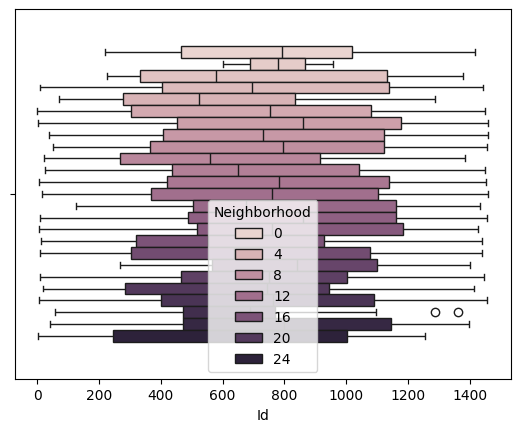

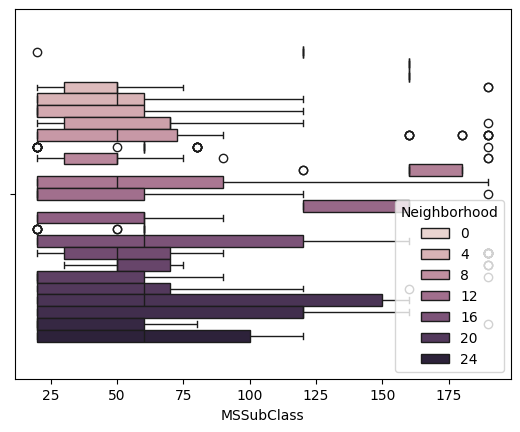

ValueError: Data must be 1-dimensional, got ndarray of shape (1460, 2) instead

In [62]:
# prompt: df2가 학습/분석에 적절한 데이터인지 검사하라.

# df2의 데이터 타입 확인
print(df2.dtypes)

# df2의 결측치 확인
print(df2.isnull().sum())

# df2의 기술 통계량 확인
print(df2.describe())

# df2의 상관관계 행렬 확인
print(df2.corr())

# 'Neighborhood' 열로 그룹화하여 상자 그림 그리기
for col in df2.columns:
    sns.boxplot(x=col, data=df2, hue="Neighborhood")
    plt.show()